# Part 1: Distance/similarities between strings

From https://pypi.org/project/textdistance/ (you can find here many more similarity/ditance metrics)


## Use case

Hamming distance between two strings (of equal length) is the number of positions at which the corresponding symbols are different



In [1]:
pip install textdistance

In [2]:
import textdistance

In [3]:
dist = textdistance.hamming.distance('test', 'text')
norm_dist = textdistance.hamming.normalized_distance('test', 'text')
sim = textdistance.hamming.similarity('test', 'text')
norm_sim = textdistance.hamming.normalized_similarity('test', 'text')
print("Hamming:\n\traw distance = %d (normalized = %.2f)\n\traw similarity = %d  (normalized = %.2f)" % (dist,norm_dist,sim,norm_sim))

Hamming:
	raw distance = 1 (normalized = 0.25)
	raw similarity = 3  (normalized = 0.75)


# Part 2: Evaluating simple annotation tasks

In [4]:
from sklearn import metrics

In [5]:
# Just a short example.
y_true = [0, 1, 0, 1, 1]
y_pred = [0, 1, 0, 0, 1]

accuracy = 0.80
precision = 1.00
recall = 0.67
F1 = F_beta=1 = 0.80
F_beta=2 = 0.71


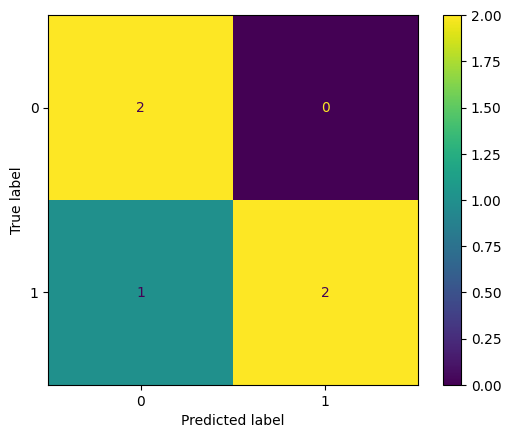

In [6]:
print("accuracy = %.2f" % metrics.accuracy_score(y_true, y_pred))
print("precision = %.2f" % metrics.precision_score(y_true, y_pred))
print("recall = %.2f" % metrics.recall_score(y_true, y_pred))
# Precision as important as Recall:
print("F1 = F_beta=1 = %.2f" % metrics.f1_score(y_true, y_pred))
# Recall more important than Precision:
print("F_beta=2 = %.2f" % metrics.fbeta_score(y_true, y_pred, beta=2))
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_true, y_pred)).plot()

In [7]:
# Although we are using 0, 1, 2, this is a categorial example
y_true = [0, 1, 0, 1, 2, 1]
y_pred = [0, 1, 0, 0, 2, 0]
print("micro-precision = %.2f" % metrics.precision_score(y_true, y_pred, average='micro'))
print("macro-precision = %.2f" % metrics.precision_score(y_true, y_pred, average='macro'))

micro-precision = 0.67
macro-precision = 0.83


In [8]:
# Numeric example (not categories)
y_true = [0.2, 0.7, 1.0, 0.4, 0.5]
y_pred = [0.1, 0.8, 0.8, 0.3, 0.5]
print("mae = %.2f" % metrics.mean_absolute_error(y_true, y_pred))
print("rmse = %.2f" % metrics.root_mean_squared_error(y_true, y_pred))

mae = 0.10
rmse = 0.12


# Part 3: Evaluating correlation of automatic evaluation with human evaluation

Now we will see two ways to evaluate automatic metrics. Let us select *translation* as our task.<br>
Fist, we will apply metrics that dirrectly compare scores between humans and metric systems; then we will apply metric systems that look at ranks.

PS: Yes, I know, it is complicated: metrics to evaluate metrics that evaluate...

## a) Pairwise score differences

Remember from previous class:
- Pearson correlation coefficient (r) measures the linear relationship between two datasets. It assumes that both datasets are normally distributed. The values range from -1 to 1, where 1 means a perfect positive linear relationship, -1 means a perfect negative linear relationship, and 0 indicates no linear relationship.   
- Spearman's rank correlation coefficient (ρ) assesses monotonic relationships, whether linear or not. It is a non-parametric measure (does not assume a specific distribution of data) that uses rank-ordered values for each variable. It can identify any monotonic trend between two variables, not just linear. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.
- Kendall's tau (τ) also measures the strength of a monotonic relationship but is based on the concordance of pairs. It is used when the sample size is small. Like Spearman's, Kendall's tau values range from -1 (perfect disagreement) to 1 (perfect agreement).

In [9]:
# Import required libraries
from scipy.stats import kendalltau, pearsonr, spearmanr

# Consider the translation of 10 sentences performed by system Sys1
# These translations are evaluated by a human H and two metrics M1 and M2
# Which metric better correles with human evaluation according with the
# previous defined metrics?

# Consider the scores
Sys1Human = [6, 8, 9, 7, 9, 9, 7, 7, 6, 6]
Sys1Metric1 = [5, 7, 8, 6, 8, 9, 7, 7, 6, 6]
Sys1Metric2 = [6, 8, 9, 7, 9, 10, 8, 8, 7, 8]

# Calculating Kendall Rank correlation
corrKH1, _ = kendalltau(Sys1Human, Sys1Metric1)
corrKH2, _ = kendalltau(Sys1Human, Sys1Metric2)
print('Kendall Rank correlation Human vs. Metric1: %.5f' % corrKH1)
print('Kendall Rank correlation Human vs. Metric2: %.5f' % corrKH2)

# Calculating Pearson correlation
corrPH1, _ = pearsonr(Sys1Human, Sys1Metric1)
corrPH2, _ = pearsonr(Sys1Human, Sys1Metric2)
print('Pearson correlation Human vs. Metric1: %.5f' % corrPH1)
print('Pearson correlation Human vs. Metric2: %.5f' % corrPH2)


# Calculating Spearman correlation
corrSH1, _ = spearmanr(Sys1Human, Sys1Metric1)
corrSH2, _ = spearmanr(Sys1Human, Sys1Metric2)
print('Spearman correlation Human vs. Metric1: %.5f' % corrSH1)
print('Spearman correlation Human vs. Metric2: %.5f' % corrSH2)


Kendall Rank correlation Human vs. Metric1: 0.86518
Kendall Rank correlation Human vs. Metric2: 0.76720
Pearson correlation Human vs. Metric1: 0.90980
Pearson correlation Human vs. Metric2: 0.83680
Spearman correlation Human vs. Metric1: 0.92561
Spearman correlation Human vs. Metric2: 0.84314


## b) Pairwise system-level metric quality

Accuracy on binary comparisons: which system is better when human rankings are considered gold labels.<br>Check: https://aclanthology.org/2021.wmt-1.57.pdf

In [10]:
# We have seen this in the theoretical class.
# We want to see how M1 and M2 relate with human evaluation.
# Considering two systems, Sys1 and Sys2, let us assume that given 10 sentences as source:
# - System 1 returns 10 translations that:
# (1) are scored by humans as Sys1Human
# (2) are scored by metric 1 as Sys1Metric1
# (3) are scored by metric 2 as Sys1Metric2
# - System 2 returns 10 translations that:
# (1) are scored by humans as Sys2Human
# (2) are scored by metric 1 as Sys2Metric1
# (3) are scored by metric 2 as Sys2Metric2

# We previously defined: Sys1Human, Sys1Metric1, Sys1Metric1
# Which Metric better correlelates with Human evaluation according with these metrics?
# Notice that we are evaluatin metrics and not the systems

Sys2Human = [6, 7, 5, 5, 9, 10, 8, 10, 7, 6]
Sys2Metric1 = [6, 8, 5, 7, 7, 6, 7, 7, 7, 9]
Sys2Metric2 = [7, 9, 4, 6, 9, 9, 9, 10, 4, 9]


def substract(list1, list2):
  result = []
  for i in range(len(list1)):
    result.append(list1[i] - list2[i])
  return result

def accuracyMetric(list1, list2):
  score = 0
  for i in range(len(list1)):
    if (list1[i] > 0 and list2[i] > 0) or (list1[i] < 0 and list2[i] < 0) or (list1[i] == 0 and list2[i] == 0): score += 1
  return score/len(list1) # should have the same size

# diffHuman: if >= 0, Sys1 is better; if < 0 , Sys2 is better
diffHuman = substract(Sys1Human, Sys2Human)

# diffMetric1 and diffMetric2: the same
diffMetric1 = substract(Sys1Metric1, Sys2Metric1)
diffMetric2 = substract(Sys1Metric2, Sys2Metric2)

print(diffHuman)
print(diffMetric1)
print(diffMetric2)

# calculates if the trend is the same (Sys1 better than Sys2 or otherwise)
acurracyM1 = accuracyMetric(diffHuman, diffMetric1)
acurracyM2 = accuracyMetric(diffHuman, diffMetric2)
print(acurracyM1)
print(acurracyM2)

[0, 1, 4, 2, 0, -1, -1, -3, -1, 0]
[-1, -1, 3, -1, 1, 3, 0, 0, -1, -3]
[-1, -1, 5, 1, 0, 1, -1, -2, 3, -1]
0.2
0.5
